# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).



In [12]:

# DOES NOT WORK ------ (BELOW)
# # OpenWeatherMap API Key
# api_key = api_keys.api_key

# # Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# ------ DOES NOT WORK (ABOVE).

  # Save config information.
url_starter = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

  # Build partial query URL
url = f"{url_starter}units={units}&APPID={api_key}"

# Print out in the window
url   

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Lukulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=lukulu
Processing Record 2 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=kapaa
Processing Record 3 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=chuy
City not found. Skipping...
Processing Record 4 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=pevek
Processing Record 5 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=hermanus
Processing Record 6 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=touros
Processing Record 7 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 58 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=vardo
City not found. Skipping...
City not found. Skipping...
Processing Record 59 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=vila franca do campo
City not found. Skipping...
Processing Record 60 | Hervey Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=hervey bay
City not found. Skipping...
Processing Record 61 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=saskylakh
Processing Record 62 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=tasiilaq
Processing Record 63 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=tuktoy

Processing Record 112 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=mount isa
Processing Record 113 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=lebu
Processing Record 114 | Ciudad Bolivar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=ciudad bolivar
City not found. Skipping...
Processing Record 115 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=avarua
Processing Record 116 | Colares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=colares
Processing Record 117 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=cape town
Processing Record 118 | Gejiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=15

Processing Record 167 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=baruun-urt
Processing Record 168 | Srednebelaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=srednebelaya
Processing Record 169 | Dolores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=dolores
City not found. Skipping...
Processing Record 170 | Laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=laguna
Processing Record 171 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=bilma
Processing Record 172 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=ucluelet
Processing Record 173 | Yaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab

Processing Record 222 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=upernavik
Processing Record 223 | Beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=beira
Processing Record 224 | Dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=dubbo
Processing Record 225 | Rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=rundu
Processing Record 226 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=muros
Processing Record 227 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=talnakh
Processing Record 228 | Altamira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=altamira
Processin

Processing Record 276 | San Joaquin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=san joaquin
Processing Record 277 | Tevriz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=tevriz
Processing Record 278 | Muzaffarabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=muzaffarabad
Processing Record 279 | Nehe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=nehe
Processing Record 280 | Benoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=benoy
Processing Record 281 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=souillac
City not found. Skipping...
Processing Record 282 | Traverse City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 331 | Sao Miguel do Araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=sao miguel do araguaia
Processing Record 332 | Neka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=neka
Processing Record 333 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=nouadhibou
Processing Record 334 | Maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=maragogi
Processing Record 335 | Oskarshamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=oskarshamn
Processing Record 336 | Soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=soyo
Processing Record 337 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9

Processing Record 387 | Dubno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=dubno
Processing Record 388 | Manama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=manama
Processing Record 389 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=goderich
Processing Record 390 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=constitucion
Processing Record 391 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=port-gentil
Processing Record 392 | Shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=shenjiamen
Processing Record 393 | Antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0

Processing Record 443 | Barra dos Coqueiros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=barra dos coqueiros
Processing Record 444 | Canakkale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=canakkale
Processing Record 445 | Miquelon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=miquelon
City not found. Skipping...
Processing Record 446 | Kautokeino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=kautokeino
Processing Record 447 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=anadyr
Processing Record 448 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=saint-pierre
Processing Record 449 | San Cristobal
http://api.openweathermap.org/da

Processing Record 499 | Kortkeros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=kortkeros
Processing Record 500 | Grootfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=grootfontein
Processing Record 501 | Duekoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=duekoue
Processing Record 502 | Nogent-le-Rotrou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=nogent-le-rotrou
Processing Record 503 | Qianan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=qianan
Processing Record 504 | Milove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca22f65b0f279699ee08&q=milove
Processing Record 505 | Pegnitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159ab3ae9208ca

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [14]:
# Save data frame to CSV
weather_data.to_csv('output_data/weather_data.csv')

# Print out in the window
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lukulu,0,ZM,1553362099,35,-14.38,23.24,82.12,9.78
1,Kapaa,75,US,1553362093,78,22.08,-159.32,71.60,21.92
2,Chuy,20,UY,1553361874,83,-33.69,-53.46,74.92,7.31
3,Pevek,0,RU,1553362102,35,69.70,170.27,-23.64,3.40
4,Hermanus,64,ZA,1553361424,80,-34.42,19.24,75.99,5.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

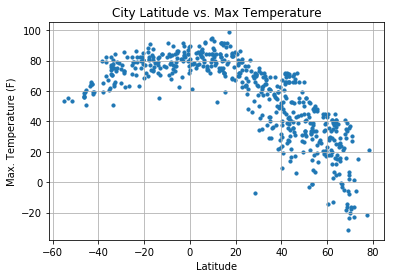

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

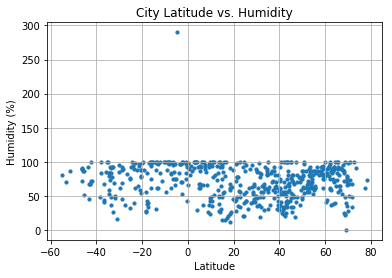

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

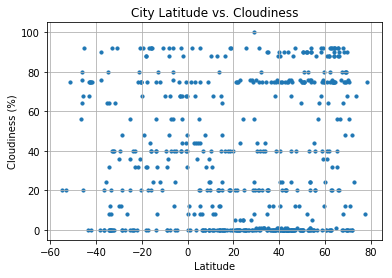

In [8]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

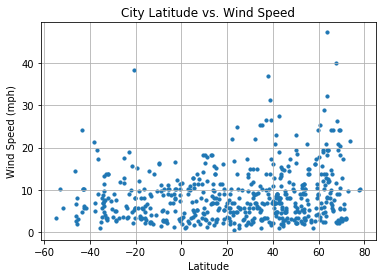

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()